In [4]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torchaudio
from utils import INPUT_DATA_DIR

In [10]:
prompts_ds = load_dataset("amaai-lab/MusicBench", split="train")

In [37]:
concepts = [
    "guitar",
    "piano",
    "drums",
    "violin",
    "saxophone",
    "synth",
    "orchestra",
    "bass",
    "melancholic",
    "happy",
    "sad",
    "dark",
    "uplifting",
    "romantic",
    "epic",
    "calm",
    "metal",
    "rock",
    "pop",
    "hip hop",
    "jazz",
    "classical",
    "electronic",
    "lofi",
    "ambient",
    "techno",
    "house",
    "dubstep",
    "funk",
    "blues",
    "reggae",
    "trap",
    "video game",
    "film score",
    "trailer music",
    "background music",
    "chill",
    "meditative",
    "retro",
    "vintage",
    "sci fi",
    "fantasy",
    "dreamy",
    "intense",
    "mysterious",
    "groovy",
    "8-bit",
    "cyberpunk",
    "rainy mood",
    "nature sounds",
    "instrumental",
    "acoustic",
    "choir",
    "opera",
    "cello",
    "flute",
    "harp",
    "banjo",
    "harmonica",
    "electric guitar",
    "singer songwriter",
    "vocals",
    "acapella",
    "spoken word",
    "percussion",
    "live",
    "studio recording",
    "mono",
    "stereo",
    "surround",
    "low fidelity",
    "high fidelity",
    "cinematic",
    "soundtrack",
    "trippy",
    "noisy",
    "experimental",
    "psychedelic",
    "minimal",
    "drone",
    "world music",
    "afrobeat",
    "latin",
    "bossa nova",
    "samba",
    "bollywood",
    "k-pop",
    "j-pop",
    "anime",
    "chiptune",
    "arcade",
    "rpg music",
    "lofi beats",
    "rain sounds",
    "ocean waves",
    "city ambience",
    "forest",
    "space music",
    "dream pop",
    "hardcore",
    "grunge",
    "indie",
]
df = pd.DataFrame(
    [(c, prompts_ds.filter(lambda x: c in x["main_caption"]).num_rows) for c in concepts],
    columns=["Concepts", "Row Counts"],
)
df = df[df["Row Counts"] > 10].sort_values("Row Counts", ascending=False)
clear_output()

<Axes: xlabel='Row Counts', ylabel='Concepts'>

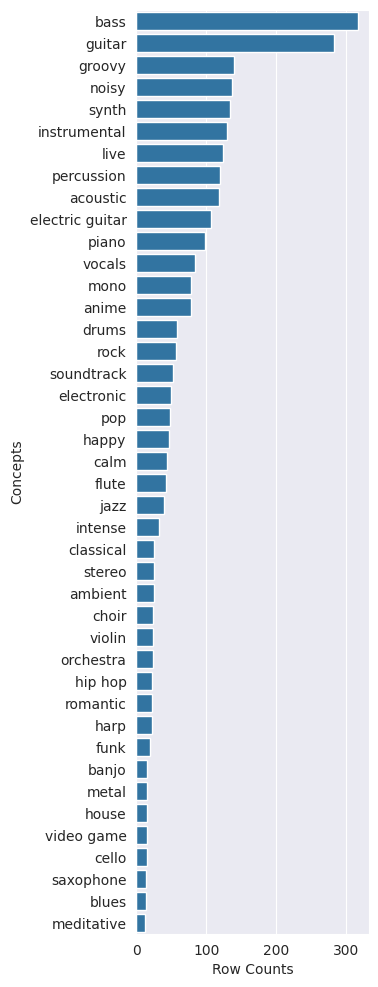

In [34]:
fig, ax = plt.subplots(figsize=(3, 12))
sns.barplot(df, y="Concepts", x="Row Counts", ax=ax)

In [21]:
def add_audio_to_sample(sample):
    audio_path = INPUT_DATA_DIR / "music-bench" / "datashare" / sample["location"]
    audio_tensor, sr = torchaudio.load(str(audio_path))
    sample["audio_tensor"] = audio_tensor.numpy()[0]
    sample["sr"] = sr
    return sample


# path = INPUT_DATA_DIR / "music-bench" / "datashare" / prompts_ds[1000]["location"]
# music, sr = torchaudio.load(str(path))
# Audio(music, rate=sr)
ds = prompts_ds.select(range(10)).map(add_audio_to_sample).select_columns(["main_caption", "audio_tensor", "sr"])